In [17]:
import scipy.stats as st
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import tqdm 
import tqdm.notebook
import scipy 
import pandas as pd
# temp: functions and more...
from utils import *

/home/ahmad/MCAA_project_ADH/utils.py:42: RuntimeWarning: overflow encountered in exp
  result = np.exp(-beta * (fj - fi))



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
fM -50.39348150372224


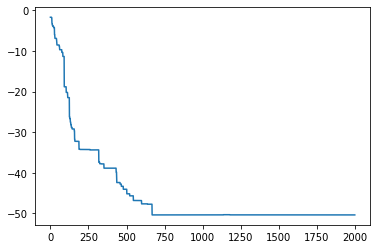

In [15]:
# np.random.seed(42)
n_iter = 2000

# parametersc
l = 0.3 # lambda in [0,1]
beta = 100

# initialization
N = 100
n_selected = 0
g = G1(N)
g = G2(N)
citiesX = g.x
citiesV = g.v

selectedCities_n = np.random.randint(2, size=(N))

# Precompute all pairwise distances between points
# TODO: This probably should be euclidean distance instead of squared distance?
# (this currently matches Heloise's original code)
pairwise_distances = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(citiesX, 'euclidean'))

fs = np.zeros(n_iter) #keep record of objective function (in fact, minus objective function)
fs[0] = objectiveFunction(N, l, citiesV, selectedCities_n, pairwise_distances)

for m in tqdm.notebook.tqdm(range(n_iter)):
    fs[m] = objectiveFunction(N, l, citiesV, selectedCities_n, pairwise_distances)
    selectedCities_n = step(N, citiesX, citiesV, selectedCities_n, beta, l, pairwise_distances)
    
print(selectedCities_n)
print('fM '+ str(fs[n_iter-1]))
plt.figure()
plt.plot(np.arange(n_iter), fs);

In [38]:
def effect_of_beta(n_iter, l, generator, N, beta_range, num_runs):
    # dictionary to save the results
    results = {beta: [] for beta in beta_range}
    g = generator(N)
    citiesX = g.x
    citiesV = g.v
    pairwise_distances = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(citiesX, 'euclidean'))
    
    for i in range(num_runs):
        selectedCities_n = np.random.randint(2, size=(N))
        for beta in beta_range:
            fs = np.zeros(n_iter) #keep record of objective function (in fact, minus objective function)
            fs[0] = objectiveFunction(N, l, citiesV, selectedCities_n, pairwise_distances)
            for m in range(n_iter):
                fs[m] = objectiveFunction(N, l, citiesV, selectedCities_n, pairwise_distances)
                selectedCities_n = step(N, citiesX, citiesV, selectedCities_n, beta, l, pairwise_distances)
            # save the result
            results[beta].append(fs[-1])
    df = pd.DataFrame(results)
    df.plot(kind="box", title=r"Effect of $\beta$. Results are for {} runs".format(num_runs))
    plt.xlabel(r"$\beta$")
    plt.ylabel("min(f)")
    return results

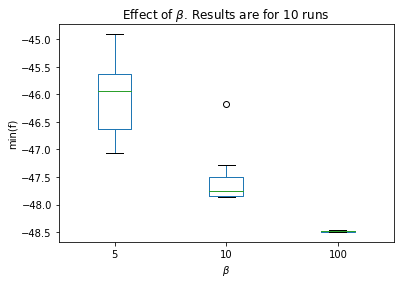

In [39]:
r = effect_of_beta(2000, 0.3, G2, 100, [5, 10, 100], 10)